## 逻辑回归

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from tqdm import tqdm
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import ops

### 初始化```learning rate```和```epoch_num```

In [417]:
learning_rate = 0.01
epoch_num = 10000

### 初始化训练集

In [418]:
def load_dataset():
    X_train, Y_train = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    # Visualize the data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=40, cmap=plt.cm.Spectral);
    X_train = X_train.T
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    
    return X_train, Y_train

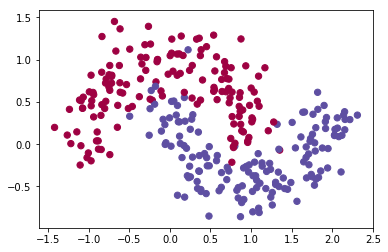

In [419]:
X_train, Y_train = load_dataset()

### 初始化```placeholder```和参数```W，b```

In [420]:
X = tf.placeholder(tf.float32, [2, None])
Y = tf.placeholder(tf.float32, [1, None])

W = tf.Variable(tf.random_normal([1, 2]), name='Weight')
b = tf.Variable(tf.random_normal([1, 1]), name='bias')

### 逻辑回归函数
$$
H(X) = sigmoid(WX + b) = \frac{1}{1+e^{WX}}
$$ 
<br\>
$$
cost(W, b) = -\frac{1}{m}\sum{Ylog(H(X))} + (1-Y)log(1-H(X))
$$

In [427]:
Y_hat = tf.sigmoid(tf.matmul(W, X) + b)

cost = -tf.reduce_mean(Y*tf.log(Y_hat) + (1-Y)*tf.log(1-Y_hat))

predict = tf.cast(Y_hat > 0.5, dtype=tf.float32)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### 训练和结果

100%|██████████| 10000/10000 [00:05<00:00, 1775.28it/s]


cost: 0.3231845498085022


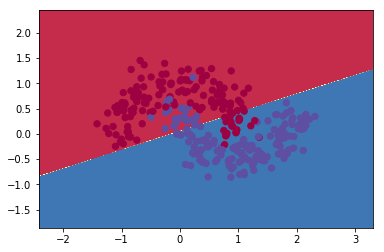

In [428]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in tqdm(range(epoch_num)):
    _, c = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})

print("cost: {}".format(c) )
plot_decision_boundary(X_train, Y_train)

In [288]:
def plot_decision_boundary(X_train, Y_train):
    X_min, X_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    Y_min, Y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    step = 0.01
    # xx, yy = np.meshgrid(np.arange(X_min, X_max, step), np.arange(Y_min, Y_max, step))
    xx, yy = np.meshgrid(np.arange(X_min, X_max, step), np.arange(Y_min, Y_max, step))

    Z = sess.run(predict, feed_dict={X: np.c_[xx.ravel(), yy.ravel()].T})
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X_train[0, :], X_train[1, :], c=Y_train.ravel(), s=40, cmap=plt.cm.Spectral)
    plt.show()